In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from glob import glob
from skimage import io


In [5]:
drive = r"D:\WorkDrive\Images\Luke Focus Images 2021-02-24"
dirs = glob(drive+"/*/")

In [68]:
df_root=None
for folder in dirs:
    file = glob(folder+"*.csv")[0]
    temp = pd.read_csv(file,names=['center', 'focus', 'lysed'])
    temp['souce']=file
    if df_root is None:
        df_root = temp
    else:
        df_root = pd.concat([df_root, temp])

In [69]:
df_root.shape

(115, 4)

In [70]:
df_root

,center,focus,lysed,souce
0,center_00123400 x_-250770 y_376569,BF 0.1188,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
1,center_00123400 x_-250770 y_376569,Manual 0.1259,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
2,center_00123400 x_-250770 y_376569,Manual 0.1401,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
0,FL center_-0073800 x_-227270 y_357350,BF -0.08600000000000001,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
1,FL center_-0073800 x_-227270 y_357350,FL -0.0856,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
...,...,...,...,...
105,center_-4902400 x_-240080 y_351940,Manual -4.8834,True,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
106,center_-4892400 x_-237440 y_350959,BF -4.9044,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
107,center_-4892400 x_-237440 y_350959,FL -4.897400000000001,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...
108,center_-4892400 x_-237440 y_350959,Manual -4.8788,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...


In [71]:
df_root["lyse plane"]=df_root['focus'].apply(lambda x: eval(x.split(" ")[1]))
df_root["method"]=df_root['focus'].apply(lambda x: x.split(" ")[0])
df_root['id_center']=df_root['center'].apply(lambda x: x.split("center")[1])

In [167]:
df_root.head(20)

,center,focus,lysed,souce,lyse plane,method,id_center
0,center_00123400 x_-250770 y_376569,BF 0.1188,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,0.1188,BF,_00123400 x_-250770 y_376569
1,center_00123400 x_-250770 y_376569,Manual 0.1259,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,0.1259,Manual,_00123400 x_-250770 y_376569
2,center_00123400 x_-250770 y_376569,Manual 0.1401,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,0.1401,Manual,_00123400 x_-250770 y_376569
0,FL center_-0073800 x_-227270 y_357350,BF -0.08600000000000001,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-0.0860,BF,_-0073800 x_-227270 y_357350
1,FL center_-0073800 x_-227270 y_357350,FL -0.0856,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-0.0856,FL,_-0073800 x_-227270 y_357350
0,center_-4959100 x_-249690 y_366750,BF -4.9713,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9713,BF,_-4959100 x_-249690 y_366750
1,center_-4959100 x_-249690 y_366750,FL -4.9613000000000005,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9613,FL,_-4959100 x_-249690 y_366750
2,center_-4959100 x_-249690 y_366750,FL -4.9613000000000005,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9613,FL,_-4959100 x_-249690 y_366750
3,center_-4959100 x_-249690 y_366750,Manual -4.9401,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9401,Manual,_-4959100 x_-249690 y_366750
4,center_-4959100 x_-249690 y_366750,Manual -4.9417,True,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9417,Manual,_-4959100 x_-249690 y_366750


In [72]:
def get_diff_focal(v):
    lp = v[v['lysed']==True]['lyse plane'].values
    if len(lp)>0:
        focus =np.mean(lp)
    else:
        focus = np.nan
    return pd.Series({'diff':focus})
    
gb = df_root.groupby(by=['id_center'])
f=gb.apply(get_diff_focal)

In [73]:
df = df_root.join(f,how='inner', on='id_center')

In [74]:
df.dropna(subset=['diff'])

,center,focus,lysed,souce,lyse plane,method,id_center,diff
0,center_-4959100 x_-249690 y_366750,BF -4.9713,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9713,BF,_-4959100 x_-249690 y_366750,-4.9417
1,center_-4959100 x_-249690 y_366750,FL -4.9613000000000005,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9613,FL,_-4959100 x_-249690 y_366750,-4.9417
2,center_-4959100 x_-249690 y_366750,FL -4.9613000000000005,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9613,FL,_-4959100 x_-249690 y_366750,-4.9417
3,center_-4959100 x_-249690 y_366750,Manual -4.9401,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9401,Manual,_-4959100 x_-249690 y_366750,-4.9417
4,center_-4959100 x_-249690 y_366750,Manual -4.9417,True,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9417,Manual,_-4959100 x_-249690 y_366750,-4.9417
...,...,...,...,...,...,...,...,...
105,center_-4902400 x_-240080 y_351940,Manual -4.8834,True,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.8834,Manual,_-4902400 x_-240080 y_351940,-4.8834
106,center_-4892400 x_-237440 y_350959,BF -4.9044,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9044,BF,_-4892400 x_-237440 y_350959,-4.8680
107,center_-4892400 x_-237440 y_350959,FL -4.897400000000001,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.8974,FL,_-4892400 x_-237440 y_350959,-4.8680
108,center_-4892400 x_-237440 y_350959,Manual -4.8788,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.8788,Manual,_-4892400 x_-237440 y_350959,-4.8680


In [75]:
df['f_diff']=df['lyse plane']-df['diff']

D:\Software\MiniConda\envs\dsp\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


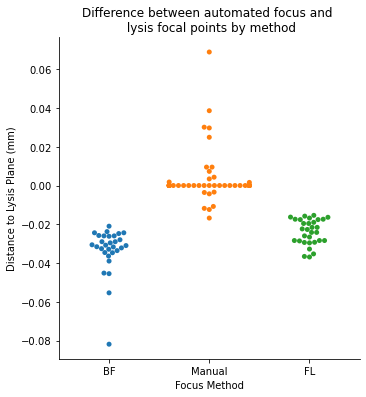

In [165]:
g = sns.catplot(x='method', y='f_diff', data=df, kind='swarm').set(ylabel='Distance to Lysis Plane (mm)', xlabel='Focus Method', title="Difference between automated focus and \n lysis focal points by method")
g.savefig("Focus Difference.png", dpi=300)

In [77]:
stats = df.groupby(by='method')['f_diff'].describe()
stats

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
BF,30.0,-0.033257,0.011711,-0.0819,-0.03435,-0.0309,-0.02605,-0.0210
FL,31.0,-0.023932,0.006500,-0.0369,-0.02850,-0.0227,-0.01760,-0.0154
Manual,49.0,0.003398,0.013757,-0.0168,0.00000,0.0000,0.00000,0.0689


## Thoughts
Easiest solution would be to add the mean difference to the focus and see what that would bring us. 
If that doesnt work, user could take over the lysis (at least for testing this makes sense, as we don't have an automatic detection for lysis built in). 
You could also try and run a probable lysis point, and move randomly around the z plane within the 95% confidence interval for the plots above. 

**Fluoresence appears to have fewer outliers**. While the data set is relatively small, there is a lot more debris that is picked up by brightfield that would agree with this. 


In [154]:
# Grab representative samples 
samples = np.random.choice(df['id_center'].unique(), 3)

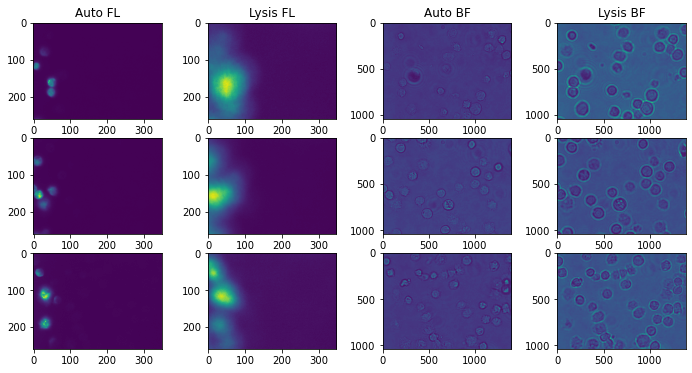

In [164]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
fig, axes = plt.subplots(3,4,figsize=(12,6))

for row, center in enumerate(samples):
    temp = df[df['id_center']==center]
    space = temp['souce'].unique()[0].strip('simple_data_out.csv')
    focus_planes = [float(x.split('_')[-1].strip('.tif'))/1e6 for x in glob(space+f'*{center}*')]
    nearest_inz = find_nearest(focus_planes,temp[temp['method']=='Manual']['lyse plane'].values[0])
    
    # Plot the fluoresence images
    col=0
    for idx in ["FL", "BF"]:
        best_z = temp[temp['method']==idx]['lyse plane'].values
        if len(best_z)>0:
            nearest_auto_z = find_nearest(focus_planes,best_z)

            best_z=round(nearest_inz*1e6)
            img_auto = glob(space+f"*{idx}**{center}_{int(nearest_auto_z*1e6):07d}*")[0]
            img_actual = glob(space+f'*{idx}**{center}_{int(nearest_inz*1e6):07d}*')[0]
            
            axes[row,col].imshow(io.imread(img_auto))
            col+=1
            axes[row,col].imshow(io.imread(img_actual))
            col+=1
            if row==0:
                
                axes[row,col-2].set_title(f"Auto {idx}")
                axes[row,col-1].set_title(f"Lysis {idx}")
                
plt.show()
fig.savefig("Output.png", dpi=300)


In [137]:
int(nearest_inz*1e6)

-4947399

In [140]:
img_actual

['D:\\WorkDrive\\Images\\Luke Focus Images 2021-02-24\\20210222\\BF center_-4938400 x_-245200 y_362350 _-4918400.tif']

In [129]:
best_z

-4947500

In [87]:
temp

,center,focus,lysed,souce,lyse plane,method,id_center,diff,f_diff
34,center_-4933000 x_-246620 y_357470,BF -4.9373,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9373,BF,_-4933000 x_-246620 y_357470,-4.9065,-0.0308
35,center_-4933000 x_-246620 y_357470,FL -4.9349,False,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9349,FL,_-4933000 x_-246620 y_357470,-4.9065,-0.0284
36,center_-4933000 x_-246620 y_357470,Manual -4.9065,True,D:\WorkDrive\Images\Luke Focus Images 2021-02-...,-4.9065,Manual,_-4933000 x_-246620 y_357470,-4.9065,0.0000


In [101]:
focus_planes.count(nearest)

2